In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('gdrive/My Drive/Copy of rig_data_cleaned.csv')
display(df.head())
display(df.tail())

,Date Time,Hole Depth,Bit Position,Bit Status,Block Height,Hook Load,ROP - Average,Top Drive RPM,Top Drive Torque,Pump SPM - Total,Pump Pressure,Flow In Rate,Rig Activity,Rig Activity Code,Rig Activity Engine,Rig Activity SubCode,Bit Weight
0,2023-01-15 01:48:46,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,33.79,0.0,1.0,0.0,0.0,0.0,1.7
1,2023-01-15 01:48:47,1.0,1.0,0.0,90.21,47.4,0.0,0.0,0.0,0.0,32.66,0.0,1.0,0.0,0.0,0.0,1.8
2,2023-01-15 01:48:48,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,33.67,0.0,1.0,0.0,0.0,0.0,1.7
3,2023-01-15 01:48:49,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,34.37,0.0,1.0,0.0,0.0,0.0,1.7
4,2023-01-15 01:48:50,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,34.98,0.0,1.0,0.0,0.0,0.0,1.7


,Date Time,Hole Depth,Bit Position,Bit Status,Block Height,Hook Load,ROP - Average,Top Drive RPM,Top Drive Torque,Pump SPM - Total,Pump Pressure,Flow In Rate,Rig Activity,Rig Activity Code,Rig Activity Engine,Rig Activity SubCode,Bit Weight
2159122,2023-04-09 06:21:09,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,38.32,0.0,1.0,0.0,0.0,0.0,27.8
2159123,2023-04-09 06:21:10,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,37.12,0.0,1.0,0.0,0.0,0.0,27.8
2159124,2023-04-09 06:21:11,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,38.16,0.0,1.0,0.0,0.0,0.0,27.8
2159125,2023-04-09 06:21:12,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,39.89,0.0,1.0,0.0,0.0,0.0,27.8
2159126,2023-04-09 06:21:13,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,39.89,0.0,1.0,0.0,0.0,0.0,27.8


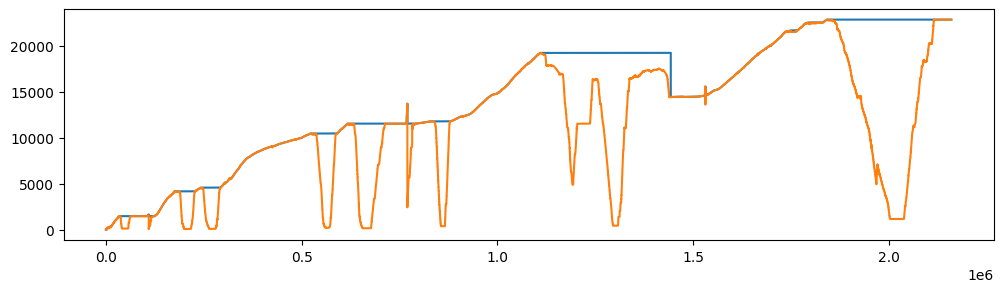

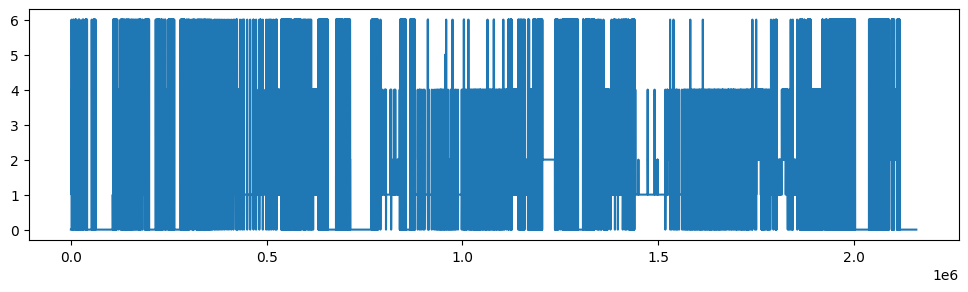

In [4]:
plt_1 = plt.figure(figsize=(12, 3))
plt.plot(df["Hole Depth"])
plt.plot(df["Bit Position"])
plt.show()
plt_1 = plt.figure(figsize=(12, 3))
plt.plot(df["Rig Activity SubCode"])

In [5]:
# Remove Rig Activity Code target from features data
y = df["Rig Activity Code"].values
X = df.drop(columns=["Rig Activity SubCode", "Rig Activity Engine","Rig Activity Code","Date Time"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [6]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=60, activation="relu", input_dim=13))
nn_model.add(tf.keras.layers.Dense(units=60, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
50605/50605 [==============================] - 101s 2ms/step - loss: -19.8117 - accuracy: 0.2447
Epoch 2/50
50605/50605 [==============================] - 98s 2ms/step - loss: -19.6874 - accuracy: 0.2664
Epoch 3/50
50605/50605 [==============================] - 98s 2ms/step - loss: -19.3349 - accuracy: 0.2989
Epoch 4/50
50605/50605 [==============================] - 98s 2ms/step - loss: -19.4432 - accuracy: 0.2976
Epoch 5/50
50605/50605 [==============================] - 96s 2ms/step - loss: -19.4374 - accuracy: 0.3005
Epoch 6/50
50605/50605 [==============================] - 98s 2ms/step - loss: -19.4458 - accuracy: 0.3028
Epoch 7/50
50605/50605 [==============================] - 98s 2ms/step - loss: -19.4769 - accuracy: 0.3024
Epoch 8/50
50605/50605 [==============================] - 98s 2ms/step - loss: -19.4726 - accuracy: 0.3024
Epoch 9/50
50605/50605 [==============================] - 98s 2ms/step - loss: -19.4652 - accuracy: 0.3009
Epoch 10/50
50605/50605 [===========